In [1]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # For tokenizers
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dimitris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dimitris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
books_data=pd.read_csv('BOOKS_DATA_updated.csv')

In [3]:
books_data.head(10)

,Title,Author,Language,Year,Text
0,The Declaration of Independence,Thomas Jefferson,English,1971,"December, 1971 [Etext #1] The Project Guten..."
1,The King James Version of the Bible,Unknown Author,English,1989,The Old Testament of the King James Version of...
2,The Complete Works of William Shakespeare,William Shakespeare,English,1994,﻿The Complete Works of William Shakespeare by...
3,Carmilla,Joseph Sheridan Le Fanu,English,2003,Carmilla by Joseph Sheridan Le Fanu Copyrigh...
4,"Divine Comedy, Longfellow's Translation, Hell",Dante Alighieri,English,1997,The Divine Comedy of Dante Alighieri Transla...
5,The Complete Poetical Works of Edgar Allan Poe,Edgar Allan Poe,English,2003,The Complete Poetical Works of Edgar Allan Poe...
6,The Book of Household Management,Mrs. Beeton,English,2003,"E-text prepared by Jonathan Ingram, Sandra Bro..."
7,The Merry Adventures of Robin Hood,Howard Pyle,English,2003,"Produced by David Widger, Ted Garvin and PG Di..."
8,Dracula's Guest,Bram Stoker,English,2003,"E-text prepared by Bill Keir, Susan Woodring, ..."
9,The Tragedy of Pudd'nhead Wilson,Mark Twain,English,2004,The Tragedy of Pudd'nhead Wilson By Mark Twai...


In [4]:
books_data[books_data['Language'] == 'English'].count()

Title       831
Author      831
Language    831
Year        831
Text        831
dtype: int64

In [5]:
# Count the number of rows where the Language is 'English'
english_row_count = books_data[books_data['Language'] == 'English'].shape[0]

print(f"Number of rows where Language is English: {english_row_count}")

Number of rows where Language is English: 831


In [6]:
books_data['Author'].count()

930

In [7]:
len(books_data['Author'].unique())

508

In [8]:
books_data['Title'].count()

930

In [9]:
len(books_data['Title'].unique())

910

In [10]:
books_data['Text'].str.len()

0        96710.0
1      4332582.0
2      5342586.0
3       155832.0
4       207682.0
         ...    
925     721540.0
926     106009.0
927      26627.0
928    2298005.0
929     178559.0
Name: Text, Length: 930, dtype: float64

In [11]:
books_data[books_data['Author'] == 'William Shakespeare'].shape[0]

16

In [12]:
books_data['Author'].describe()

count                930
unique               508
top       Unknown Author
freq                  46
Name: Author, dtype: object

In [13]:
books_data['Author'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 930 entries, 0 to 929
Series name: Author
Non-Null Count  Dtype 
--------------  ----- 
930 non-null    object
dtypes: object(1)
memory usage: 7.4+ KB


In [14]:
# Find duplicate authors
duplicate_authors = books_data['Author'].value_counts()[books_data['Author'].value_counts() > 1]

# Number of duplicate authors
num_duplicate_authors = len(duplicate_authors)
print(f"Number of duplicate authors: {num_duplicate_authors}")

# Print the names of the duplicate authors and their counts
print("Duplicate authors and their counts:")
print(duplicate_authors)

Number of duplicate authors: 133
Duplicate authors and their counts:
Author
Unknown Author         46
Charles Dickens        17
Various                16
William Shakespeare    16
Mark Twain             13
                       ..
Alexander Hamilton      2
Walt Whitman            2
Plutarch                2
W. Somerset Maugham     2
John Bunyan             2
Name: count, Length: 133, dtype: int64


In [15]:
# Find duplicate Titles
duplicate_titles = books_data['Title'].value_counts()[books_data['Title'].value_counts() > 1]

# Number of duplicate authors
num_duplicate_titles = len(duplicate_titles)
print(f"Number of duplicate titles: {num_duplicate_titles}")

# Print the names of the duplicate authors and their counts
print("Duplicate titles and their counts:")
print(duplicate_titles)

Number of duplicate titles: 17
Duplicate titles and their counts:
Title
Frankenstein; Or, The Modern Prometheus        3
Alice's Adventures in Wonderland               3
The Art of War                                 3
Pride and Prejudice                            2
The Strange Case of Dr. Jekyll and Mr. Hyde    2
The Iliad                                      2
The Secret Garden                              2
Hamlet, Prince of Denmark                      2
The Wind in the Willows                        2
The Odyssey                                    2
The Picture of Dorian Gray                     2
The Wonderful Wizard of Oz                     2
Notre-Dame de Paris                            2
Paradise Lost                                  2
A Christmas Carol                              2
The Federalist Papers                          2
Madame Bovary                                  2
Name: count, dtype: int64


In [16]:
books_data['Title'].describe()

count                                         930
unique                                        910
top       Frankenstein; Or, The Modern Prometheus
freq                                            3
Name: Title, dtype: object

In [17]:
# Count the number of NaN values in the Year column
books_data['Year'].isna().sum()

0

In [18]:
# Drop rows where the Year is NaN
books_data = books_data.dropna(subset=['Year'])

In [19]:
books_data['Year'].isna().sum()

0

# Descriptive Statistics

In [20]:
books_data1=books_data

# Number of books by Language

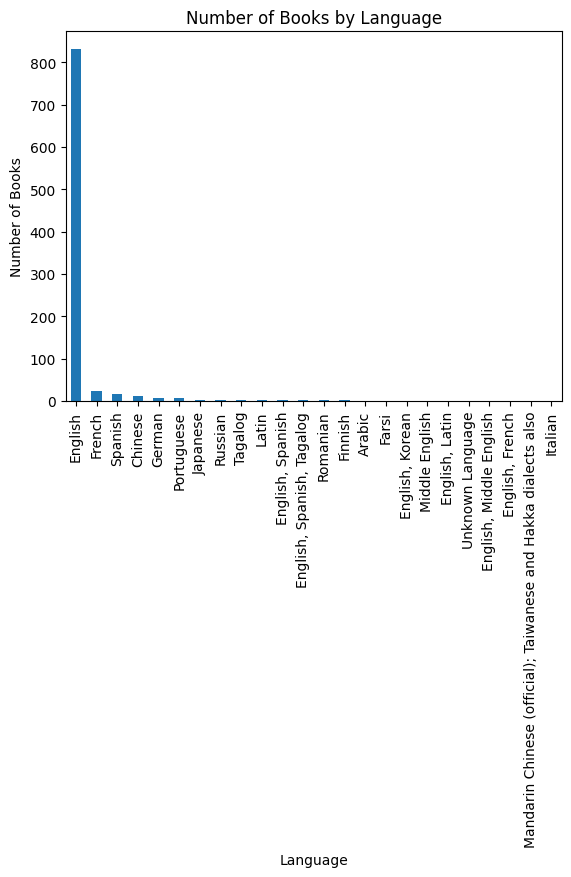

In [21]:
books_data1['Language'].value_counts().plot(kind='bar')
plt.title('Number of Books by Language')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.show()

# Top 20 Authors

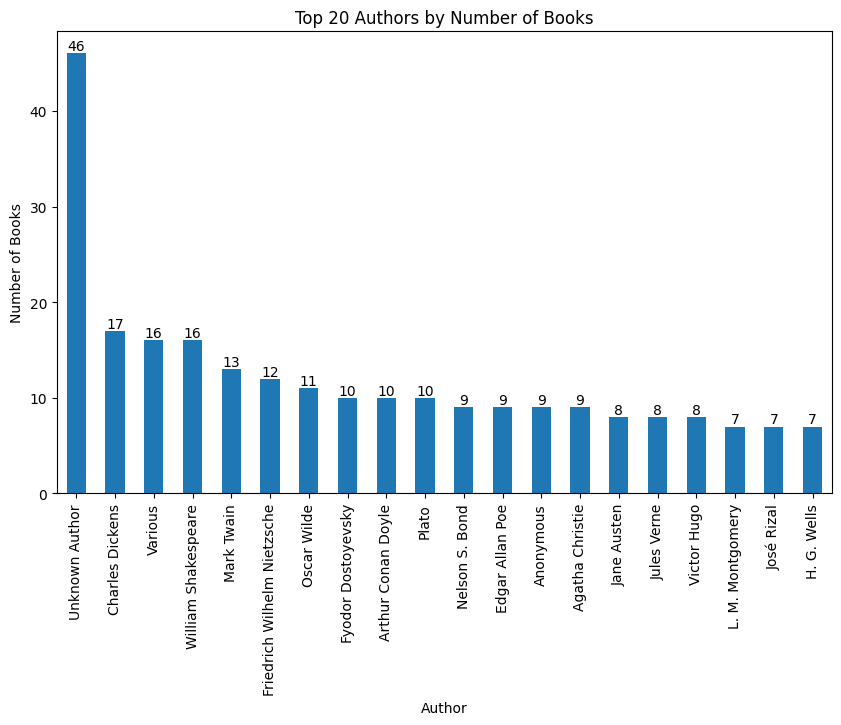

In [22]:
ax = books_data1['Author'].value_counts().head(20).plot(kind='bar', figsize=(10,6))
plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Add the count numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Distribution of Publication Years

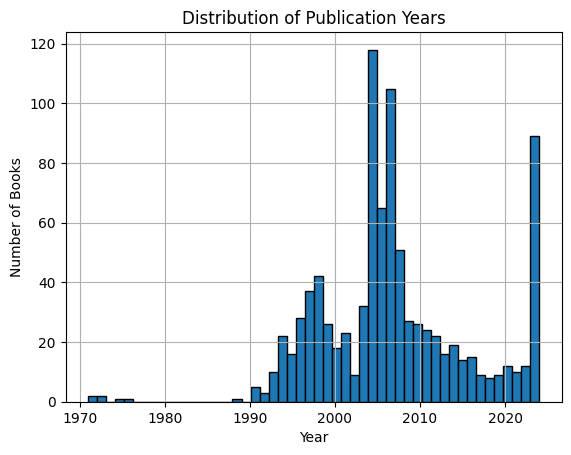

In [23]:
books_data1['Year'] = pd.to_numeric(books_data1['Year'], errors='coerce')  # Convert Year to numeric, handle errors
books_data1['Year'].dropna().hist(bins=50, edgecolor='black')
plt.title('Distribution of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

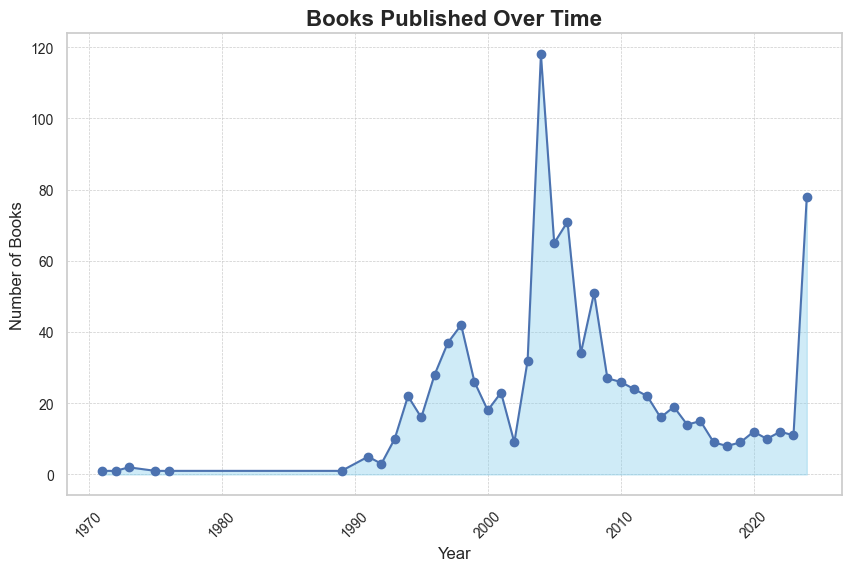

In [24]:
sns.set(style="whitegrid")

# Convert Year to numeric, handle errors
books_data1['Year'] = pd.to_numeric(books_data1['Year'], errors='coerce')

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(books_data1.groupby('Year').size(), marker='o', linestyle='-', color='b', linewidth=1.5, markersize=6)

plt.title('Books Published Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)  
plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)
plt.fill_between(books_data1.groupby('Year').size().index, books_data1.groupby('Year').size(), color='skyblue', alpha=0.4)
plt.show()

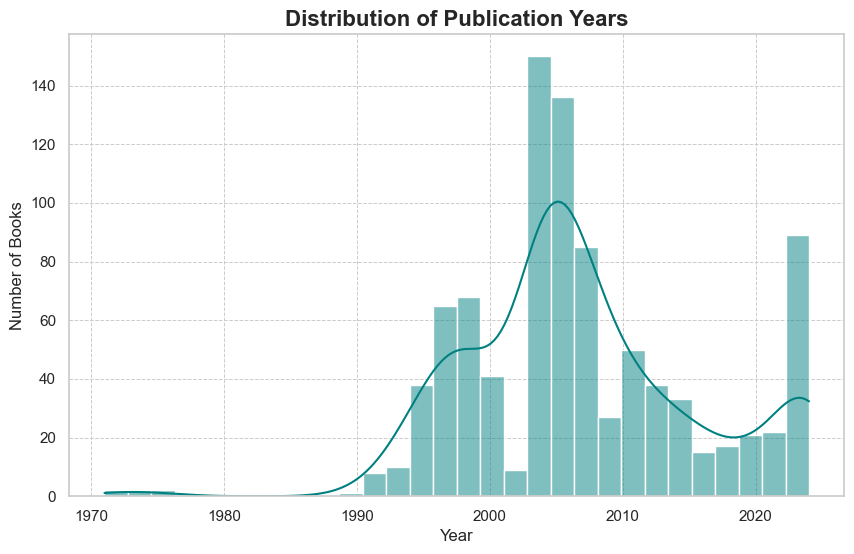

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(books_data1['Year'].dropna(), bins=30, kde=True, color='teal')

plt.title('Distribution of Publication Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7)
plt.show()

# Number of Books Published Per Decade

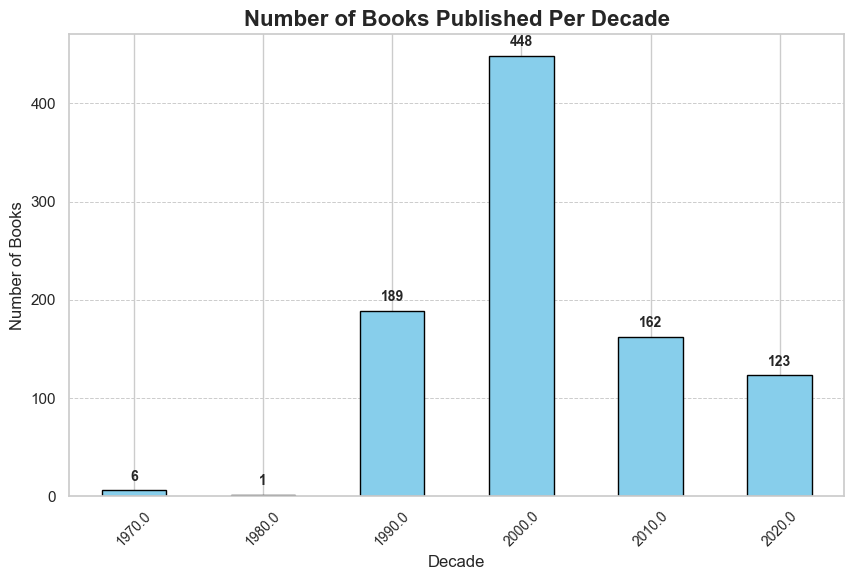

In [26]:
# Group years into decades
books_data1['Decade'] = (books_data1['Year'] // 10) * 10
books_data1 = books_data1.dropna(subset=['Decade'])
books_data1.loc[:, 'Decade'] = books_data1['Decade'].astype(int)

plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
ax = books_data1.groupby('Decade').size().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Books Published Per Decade', fontsize=16, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)

plt.xticks(rotation=45, fontsize=10) 
plt.grid(axis='y', linestyle='--', linewidth=0.7)  

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')
plt.show()

# Distribution of Text Length

/var/folders/m8/m6xqmpcd1s9_zcxbxblkdx_00000gn/T/ipykernel_4324/4164795827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_data1.loc[:, 'Text Length'] = books_data1['Text'].apply(len)


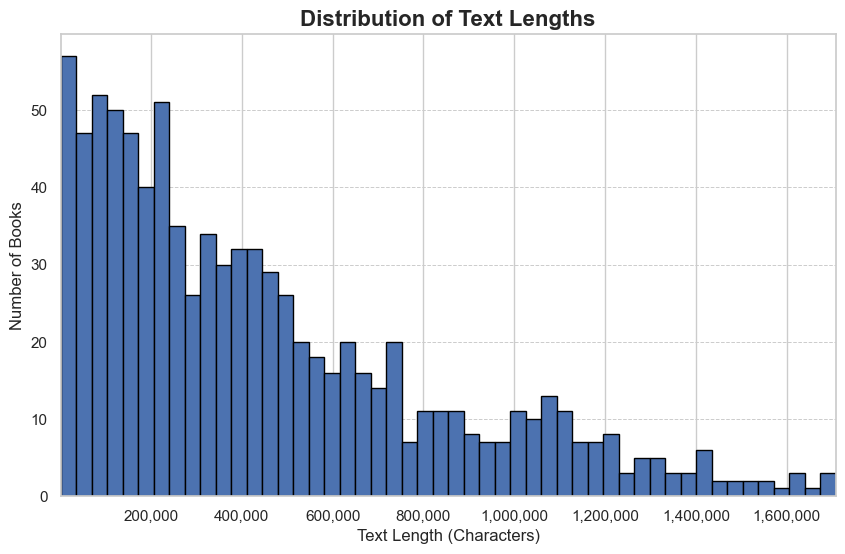

In [27]:
import matplotlib.ticker as mtick

books_data1.loc[:, 'Text Length'] = books_data1['Text'].apply(len)

# Get the minimum and 95th percentile for the x-axis limits
min_length = books_data1['Text Length'].min()
max_length = books_data1['Text Length'].quantile(0.95)

plt.figure(figsize=(10, 6))  
books_data1['Text Length'].hist(bins=50, edgecolor='black', range=(min_length, max_length))

plt.title('Distribution of Text Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Text Length (Characters)', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)

plt.xlim([min_length, max_length])
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

/var/folders/m8/m6xqmpcd1s9_zcxbxblkdx_00000gn/T/ipykernel_4324/4249088764.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_data1['Text Length Category'] = pd.cut(books_data1['Text Length'], bins=bins, labels=labels)


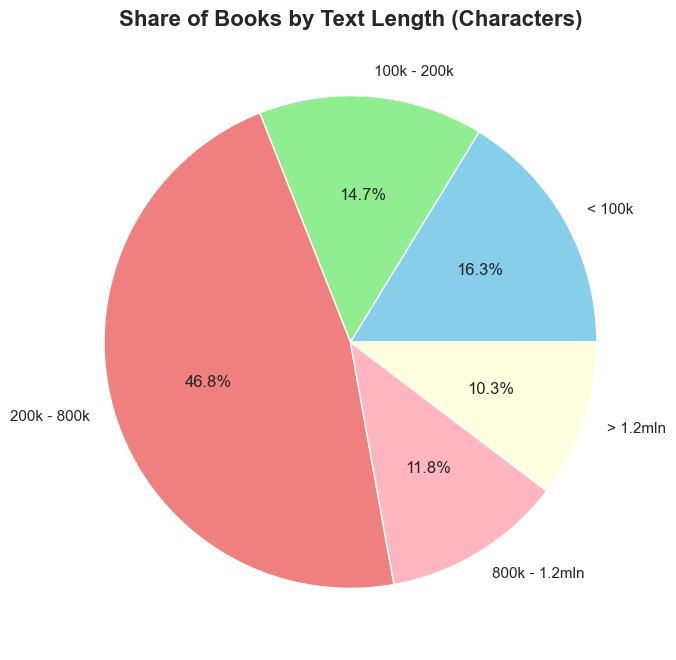

In [28]:
# Calculate text length in characters
books_data1.loc[:, 'Text Length'] = books_data1['Text'].apply(len)

# Define bins based on the specified ranges, adding < 100k and 100k - 200k
bins = [0, 100000, 200000, 800000, 1200000, float('inf')]
labels = ['< 100k', '100k - 200k', '200k - 800k', '800k - 1.2mln', '> 1.2mln']

# Categorize books into these bins
books_data1['Text Length Category'] = pd.cut(books_data1['Text Length'], bins=bins, labels=labels)

# Calculate the percentage of books in each category
category_percentages = books_data1['Text Length Category'].value_counts(normalize=True).sort_index() * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
category_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow'])
plt.title('Share of Books by Text Length (Characters)', fontsize=16, fontweight='bold')
plt.ylabel('')  
plt.show()

# Word Cloud of Most Frequent Words in Book Titles

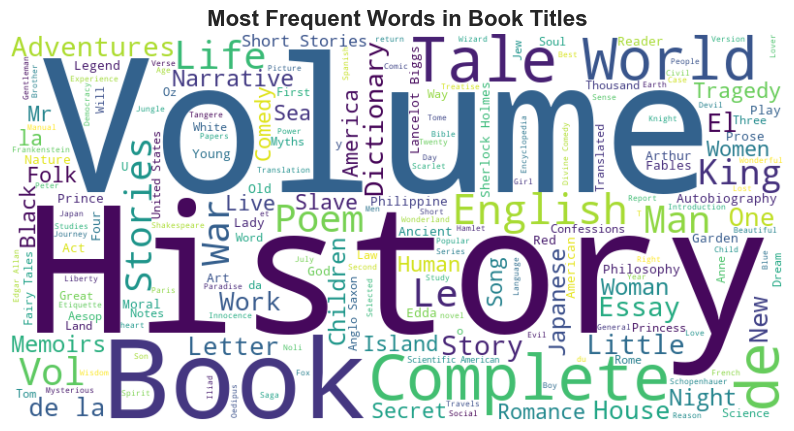

In [29]:
from wordcloud import WordCloud
# Combine all titles into one large string
titles1 = ' '.join(books_data1['Title'].dropna().tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles1)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Most Frequent Words in Book Titles', fontsize=16, fontweight='bold')
plt.show()

In [30]:
# Filter the DataFrame to keep only books in English
books_data = books_data[books_data['Language'].str.lower() == 'english'].reset_index(drop=True)
print(f"Filtered data to include only English books. Total books: {len(books_data)}")

Filtered data to include only English books. Total books: 831


# DATA PRE-PROCESSING

In [31]:
# Ensure that tqdm works with pandas
tqdm.pandas()

# Punctuation removal
punctuation_regex = re.compile(f"[{re.escape(string.punctuation)}]")

# Load stopwords
stopwords_set = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text_advanced(text, max_words=15000):
    text = text.lower()  # Convert to lowercase
    text = punctuation_regex.sub(" ", text)  # Remove punctuation
    words = word_tokenize(text)[:max_words]  # Tokenize text
    words = [word for word in words if word not in stopwords_set]  # Remove stopwords
    return " ".join(words)

# Apply the function to the dataset
books_data['Processed_Text'] = books_data['Text'].progress_apply(preprocess_text_advanced)

100%|█████████████████████████████████████████| 831/831 [03:12<00:00,  4.32it/s]


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000,  stop_words='english')
tfidf_matrix = vectorizer.fit_transform(books_data['Processed_Text'])

# Train the NMF model using 10 topics
nmf_model = NMF(n_components=10, max_iter=500, init='nndsvd', random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf_matrix)

In [41]:
# Function to preview the topics with the most relevant words
def get_nmf_topics(model, n_top_words, vectorizer):
    feat_names = vectorizer.get_feature_names_out()
    word_dict = {}
    
    for i in range(model.n_components_):  # Loop over each topic
        words_ids = model.components_[i].argsort()[:-n_top_words - 1:-1]
        words = [feat_names[key] for key in words_ids]
        
        # Clean up words
        words = [re.sub(r'\S*@\S*\s?', '', sent) for sent in words]
        words = [re.sub(r'\s+', ' ', sent) for sent in words]
        words = [re.sub(r"\'", "", sent) for sent in words]
        
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words
        
    return pd.DataFrame(word_dict)

In [42]:
# Example to get the top 10 words from each topic
topic_preview = get_nmf_topics(nmf_model, 10, vectorizer)
topic_preview

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,like,man,thou,war,chapter,mr,said,holmes,illustration,biggs
1,little,life,thy,great,whale,mrs,man,watson,fig,hanson
2,eyes,nature,thee,king,sir,miss,went,mr,little,lancelot
3,time,world,hath,men,quixote,sir,little,said,tom,sparks
4,night,things,shall,people,monsieur,lady,came,man,mr,hank
5,long,men,love,time,cardinal,said,like,sir,water,saturn
6,day,god,unto,government,book,little,know,room,tree,said
7,old,good,god,states,ii,know,got,colonel,fox,cap
8,sea,mind,lord,country,great,good,good,street,cat,like
9,life,philosophy,hast,english,iii,young,old,door,peter,ship


In [43]:
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity

def find_books_by_word_nmf(word, books_data, nmf_model, vectorizer, nmf_topics):
    # Transform and project the input word into the TF-IDF space
    word_vector = vectorizer.transform([word.lower()])
    word_topic_distribution = nmf_model.transform(word_vector)
    
    # Calculate the cosine similarity between the word's topic distribution and each book's topic distribution
    similarities = cosine_similarity(word_topic_distribution, nmf_topics).flatten()
    
    # Add the similarity scores to the DataFrame and sort it
    books_data['Similarity'] = similarities
    books_data_sorted = books_data.sort_values(by='Similarity', ascending=False).reset_index(drop=True)
    
    # Get the top 10 recommendations
    top_books = books_data_sorted[['Title', 'Author', 'Similarity']].head(10)
    
    # Format scores to 4 decimals
    top_books['Similarity'] = top_books['Similarity'].round(4)
    
    # Apply color gradient to 'Similarity' column
    styled_books = top_books.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'left')]}]).background_gradient(
        subset=['Similarity'], cmap='Greens')

    display(styled_books)

In [45]:
# Example usage:
find_books_by_word_nmf('love', books_data, nmf_model, vectorizer, nmf_topics)

,Title,Author,Similarity
0,On the Nature of Things,Titus Lucretius Carus,0.981200
1,The Flowers of Evil,Charles Baudelaire,0.977800
2,Childe Harold's Pilgrimage,Baron George Gordon Byron Byron,0.976400
3,The Poems of Sappho: An Interpretative Rendition into English,Sappho,0.974100
4,Poems and Songs of Robert Burns,Robert Burns,0.968500
5,"The Rámáyan of Válmíki, translated into English verse",Valmiki,0.964800
6,A Midsummer Night's Dream,William Shakespeare,0.962000
7,The divine comedy,Dante Alighieri,0.960700
8,Thus Spake Zarathustra: A Book for All and None,Friedrich Wilhelm Nietzsche,0.960500
9,Faust [part 1]. Translated Into English in the Original Metres,Johann Wolfgang von Goethe,0.957900


In [46]:
# Example usage:
find_books_by_word_nmf('history', books_data, nmf_model, vectorizer, nmf_topics)

,Title,Author,Similarity
0,"The Influence of Sea Power Upon History, 1660-1783",A. T. Mahan,0.999600
1,The Suppression of the African Slave Trade to the United States of America,W. E. B. Du Bois,0.997900
2,"The Philippine Islands, 1493-1898 — Volume 07 of 55",Unknown Author,0.993600
3,The Art of War,baron de Antoine Henri Jomini,0.993300
4,A History of the Philippines,David P. Barrows,0.993100
5,The Art of War,active 6th century B.C. Sunzi,0.988500
6,"The Lives of the Twelve Caesars, Complete",Suetonius,0.987600
7,The Anglo-Saxon Chronicle,Unknown Author,0.987500
8,Lincoln's Gettysburg Address,Abraham Lincoln,0.986400
9,The United States Constitution,United States,0.986200


In [59]:
# Example usage:
find_books_by_word_nmf('politics', books_data, nmf_model, vectorizer, nmf_topics)

,Title,Author,Similarity
0,Laws,Plato,0.999200
1,Democracy in America — Volume 2,Alexis de Tocqueville,0.994300
2,The Enchiridion,Epictetus,0.992200
3,Politics: A Treatise on Government,Aristotle,0.990500
4,On Liberty,John Stuart Mill,0.989900
5,The Social Contract & Discourses,Jean-Jacques Rousseau,0.986500
6,The Subjection of Women,John Stuart Mill,0.983700
7,The symbolism of Freemasonry,Albert Gallatin Mackey,0.982600
8,The Poetics of Aristotle,Aristotle,0.980500
9,"Shakespearean Tragedy: Lectures on Hamlet, Othello, King Lear, Macbeth",A. C. Bradley,0.980500


In [60]:
# Example usage:
find_books_by_word_nmf('war', books_data, nmf_model, vectorizer, nmf_topics)

,Title,Author,Similarity
0,"The Philippine Islands, 1493-1898 — Volume 07 of 55",Unknown Author,0.999300
1,A History of the Philippines,David P. Barrows,0.996900
2,"The Influence of Sea Power Upon History, 1660-1783",A. T. Mahan,0.996900
3,The Suppression of the African Slave Trade to the United States of America,W. E. B. Du Bois,0.994100
4,The Art of War,baron de Antoine Henri Jomini,0.993400
5,"The Lives of the Twelve Caesars, Complete",Suetonius,0.992300
6,Lincoln's Gettysburg Address,Abraham Lincoln,0.992200
7,The United States Constitution,United States,0.991900
8,"Current History, Vol. VIII, No. 3, June 1918",Various,0.991800
9,The Anglo-Saxon Chronicle,Unknown Author,0.990700


### Exporting and saving the model

In [61]:
import joblib
 
# Save vectorizer and NMF model
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(nmf_model, 'nmf_model.pkl')
joblib.dump(nmf_topics, 'nmf_topics.pkl')

['nmf_topics.pkl']